In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib as mpl
 
mpl.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
df['기준년월'].value_counts()

202003    135706
202103    128725
201909    109747
202009     76858
201903     68261
Name: 기준년월, dtype: int64

In [5]:
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_2009 = df[df['기준년월'] == 202009]

In [6]:
df_2009.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
312444,202009,20,여가/스포츠,2013,여행,남성,50대,성인자녀가구,서울특별시,강동구,길동,4204543,85
312455,202009,11,패션잡화,1112,가방,여성,40대,초중고자녀가구,서울특별시,양천구,목동,7081463,72
312456,202009,11,패션잡화,1111,신발,여성,40대,초중고자녀가구,서울특별시,양천구,목동,3520400,72
312462,202009,16,식품,1612,음료,여성,30대,신혼영유아가구,서울특별시,강북구,번동,1998274,89
312466,202009,16,식품,1612,음료,여성,30대,신혼영유아가구,서울특별시,동작구,본동,305109,14
312479,202009,16,식품,1612,음료,여성,30대,신혼영유아가구,서울특별시,마포구,중동,212630,10
312489,202009,20,여가/스포츠,2013,여행,여성,20대,1인가구,서울특별시,도봉구,창동,4730428,99
312490,202009,16,식품,1612,음료,여성,60대 이상,노인가구,서울특별시,도봉구,창동,352290,27
312505,202009,11,패션잡화,1112,가방,여성,30대,신혼영유아가구,서울특별시,구로구,항동,3540612,14
312506,202009,16,식품,1612,음료,여성,30대,신혼영유아가구,서울특별시,구로구,항동,1117577,58


In [7]:
sigoongu = list(set(df_2009['고객소재지_시군구']))
print(len(sigoongu))

25


In [8]:
big_category = list(set(df_2009['품목대분류명']))
print(len(big_category))

middle_category = list(set(df_2009['품목중분류명']))
print(len(middle_category))

13
50


In [9]:
lifestyle = list(set(df_2009['가구생애주기']))
print(len(lifestyle))
lifestyle

5


['초중고자녀가구', '성인자녀가구', '신혼영유아가구', '노인가구', '1인가구']

지역별 매출
송파구     3329
강남구     3191
마포구     2574
강동구     2395
은평구     2387
강서구     2360
성북구     2239
영등포구    2227
서초구     2060
서대문구    1952
구로구     1945
동작구     1915
동대문구    1816
노원구     1794
성동구     1775
광진구     1627
중랑구     1626
용산구     1424
양천구     1370
관악구     1344
도봉구     1189
강북구     1101
금천구      941
종로구      824
중구       667
Name: 고객소재지_시군구, dtype: int64


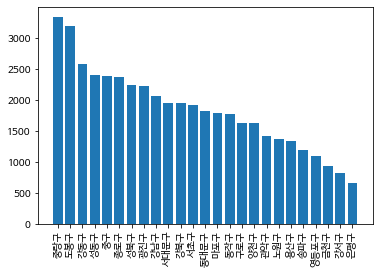

In [10]:
print('지역별 매출')
print(df_2009['고객소재지_시군구'].value_counts())
df_2009_total = df_2009['고객소재지_시군구'].value_counts().tolist()

plt.bar(sigoongu, df_2009_total)
plt.xticks(rotation = 90)
plt.show()

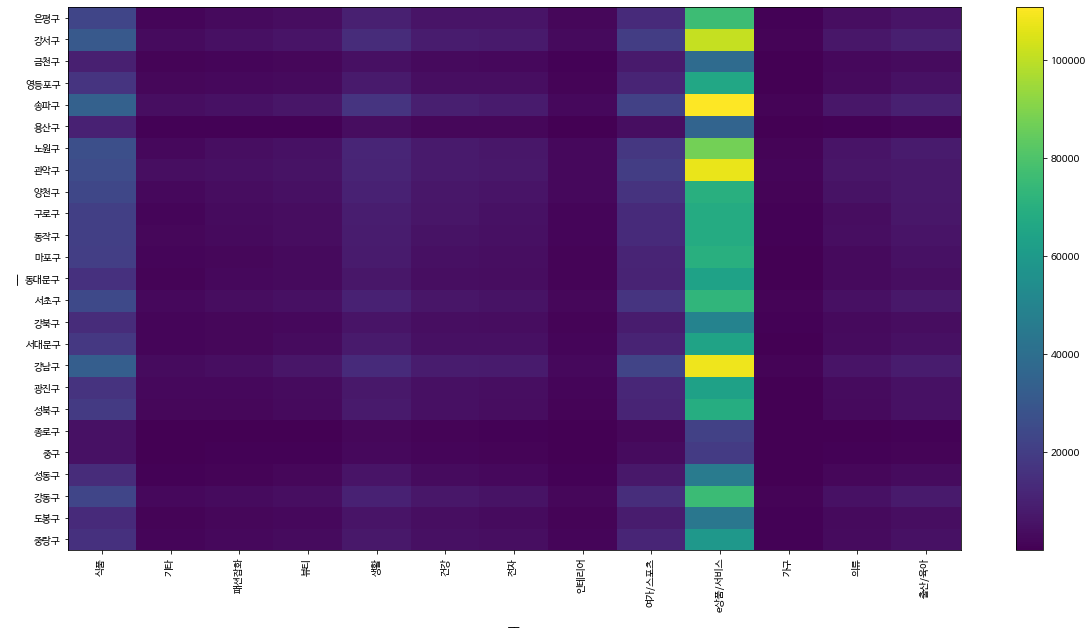

In [11]:
# 시군구 - 매출건수(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_2009[df_2009['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_large = sigoongu_moneycount_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_moneycount_large)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_large.columns), 1), sigoongu_moneycount_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_large.index), 1), sigoongu_moneycount_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [12]:
#  시군구 - 매출건수(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_2009[df_2009['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False)

,식품,기타,패션잡화,뷰티,생활,건강,전자,인테리어,여가/스포츠,e상품/서비스,가구,의류,출산/육아
중랑구,17.0,16.0,13.0,13.0,17.0,12.0,15.0,11.0,13.0,18.0,13.0,12.0,14.0
도봉구,21.0,19.0,18.0,20.0,19.0,19.0,20.0,15.0,19.0,21.0,14.0,19.0,18.0
강동구,8.0,9.0,8.0,8.0,7.0,6.0,9.0,9.0,8.0,7.0,8.0,7.0,5.0
성동구,19.0,22.0,22.0,22.0,21.0,21.0,21.0,22.0,22.0,20.0,22.0,22.0,21.0
중구,25.0,24.0,23.0,24.0,24.0,24.0,24.0,24.0,24.0,25.0,23.0,23.0,24.0
종로구,24.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,24.0,25.0,25.0,25.0
성북구,13.0,12.0,16.0,18.0,13.0,13.0,17.0,18.0,16.0,11.0,17.0,17.0,16.0
광진구,16.0,6.0,12.0,12.0,16.0,16.0,13.0,12.0,12.0,17.0,18.0,14.0,13.0
강남구,2.0,3.0,4.0,2.0,3.0,3.0,2.0,2.0,1.0,2.0,7.0,5.0,3.0
서대문구,14.0,15.0,17.0,14.0,15.0,14.0,12.0,12.0,18.0,15.0,16.0,13.0,17.0


In [13]:
#  각 시군구 내에서 매출건수(품목대분류명) 기준으로 순위
pack = []
for gu in sigoongu:
    temp = df_2009[df_2009['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False, axis = 1)

,식품,기타,패션잡화,뷰티,생활,건강,전자,인테리어,여가/스포츠,e상품/서비스,가구,의류,출산/육아
중랑구,2.0,11.0,10.0,9.0,4.0,6.0,7.0,12.0,3.0,1.0,13.0,8.0,5.0
도봉구,2.0,12.0,10.0,9.0,4.0,5.0,7.0,11.0,3.0,1.0,13.0,8.0,6.0
강동구,2.0,11.0,10.0,9.0,4.0,6.0,7.0,12.0,3.0,1.0,13.0,8.0,5.0
성동구,2.0,11.0,10.0,8.0,4.0,5.0,7.0,12.0,3.0,1.0,13.0,9.0,6.0
중구,2.0,11.0,10.0,8.0,4.0,5.0,7.0,12.0,3.0,1.0,13.0,9.0,6.0
종로구,2.0,11.0,10.0,9.0,4.0,5.0,7.0,12.0,3.0,1.0,13.0,8.0,6.0
성북구,2.0,11.0,10.0,9.0,4.0,6.0,7.0,12.0,3.0,1.0,13.0,8.0,5.0
광진구,2.0,11.0,10.0,8.0,4.0,6.0,7.0,12.0,3.0,1.0,13.0,9.0,5.0
강남구,2.0,11.0,10.0,8.0,4.0,5.0,7.0,12.0,3.0,1.0,13.0,9.0,6.0
서대문구,2.0,11.0,10.0,9.0,4.0,6.0,5.0,12.0,3.0,1.0,13.0,8.0,7.0


In [14]:
# 클러스터링
# 시군구 - 매출건수(품목대분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_moneycount_large['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_moneycount_large[sigoongu_moneycount_large['cluster_id'] == i]
    print(temp['cluster_id'])

강동구    0
서초구    0
양천구    0
노원구    0
은평구    0
Name: cluster_id, dtype: int32
도봉구    1
성동구    1
강북구    1
용산구    1
금천구    1
Name: cluster_id, dtype: int32
강남구    2
관악구    2
송파구    2
강서구    2
Name: cluster_id, dtype: int32
중랑구     3
성북구     3
광진구     3
서대문구    3
동대문구    3
마포구     3
동작구     3
구로구     3
영등포구    3
Name: cluster_id, dtype: int32
중구     4
종로구    4
Name: cluster_id, dtype: int32


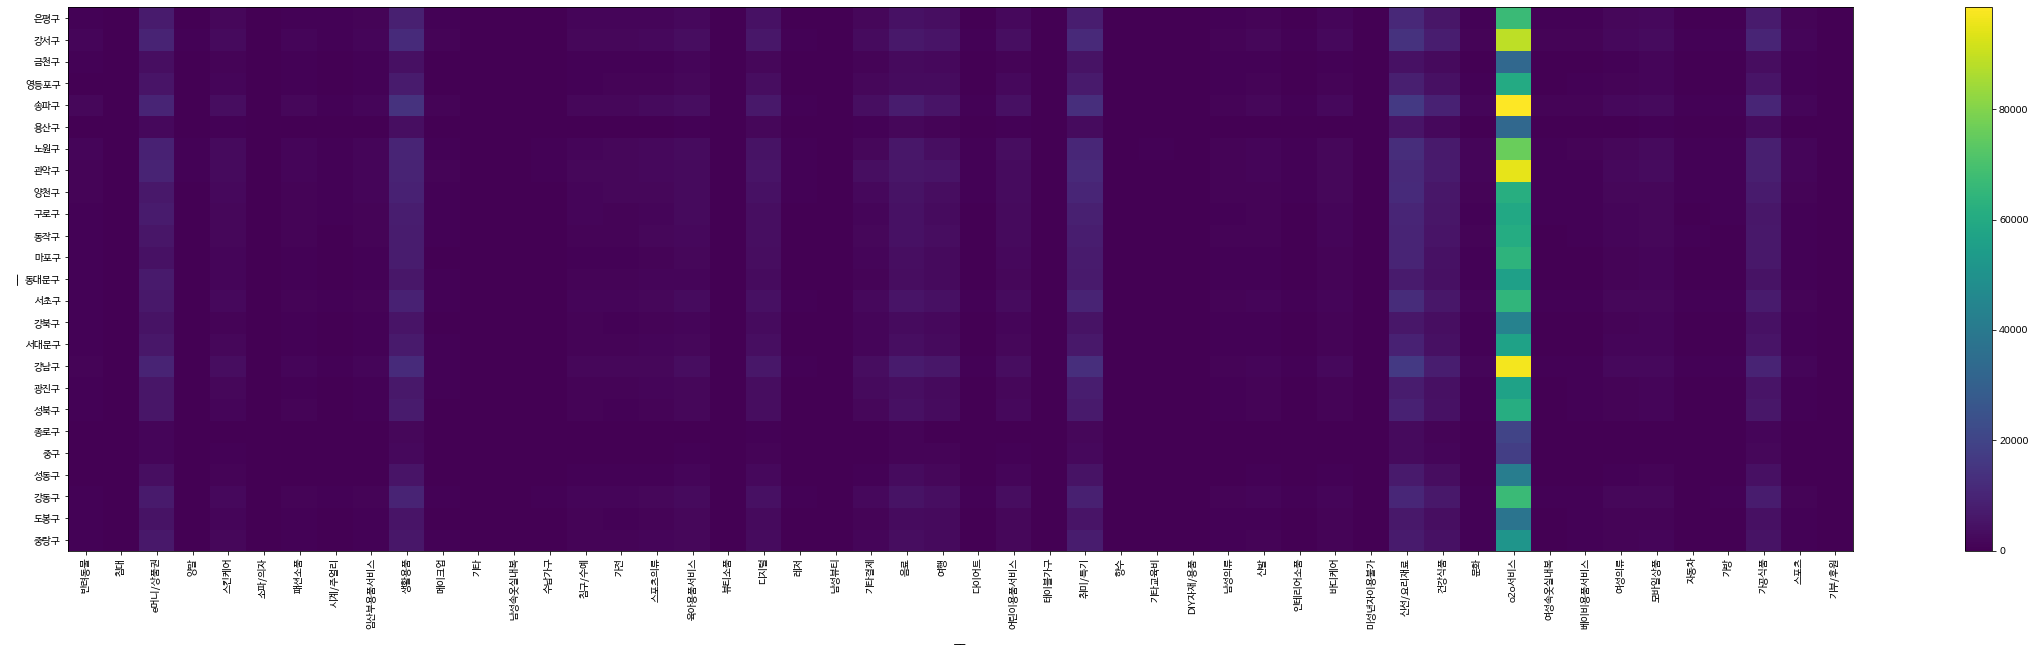

In [15]:
# 시군구 - 매출건수(품목중분류명)
pack = []
for gu in sigoongu:
    temp = df_2009[df_2009['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_middle = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_middle = sigoongu_moneycount_middle.fillna(0)
plt.figure(figsize=(40,10))
plt.pcolor(sigoongu_moneycount_middle)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_middle.columns), 1), sigoongu_moneycount_middle.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_middle.index), 1), sigoongu_moneycount_middle.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [16]:
#  시군구 - 매출건수(품목중분류명) - 순위
pack = []
for gu in sigoongu:
    temp = df_2009[df_2009['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False)

,반려동물,침대,e머니/상품권,양말,스킨케어,소파/의자,패션소품,시계/주얼리,임산부용품서비스,생활용품,...,o2o서비스,여성속옷실내복,베이비용품서비스,여성의류,모바일상품,자동차,가방,가공식품,스포츠,기부/후원
중랑구,8.0,7.0,12.0,13.0,14.0,17.0,14.0,11.0,14.0,17.0,...,18.0,11.0,8.0,13.0,14.0,18.0,12.0,17.0,13.0,4.0
도봉구,14.0,12.0,18.0,16.0,19.0,15.0,20.0,16.0,19.0,21.0,...,21.0,17.0,15.0,20.0,21.0,12.0,15.0,21.0,19.0,4.0
강동구,9.0,12.0,9.0,8.0,8.0,6.0,9.0,8.0,8.0,6.0,...,7.0,8.0,7.0,7.0,8.0,9.0,8.0,6.0,8.0,1.0
성동구,21.0,15.0,22.0,18.0,21.0,23.0,22.0,23.0,22.0,19.0,...,20.0,22.0,22.0,21.0,22.0,23.0,22.0,20.0,22.0,4.0
중구,24.0,18.0,25.0,25.0,24.0,21.0,24.0,22.0,24.0,24.0,...,25.0,24.0,23.0,23.0,24.0,22.0,24.0,24.0,23.0,4.0
종로구,25.0,18.0,24.0,24.0,25.0,24.0,25.0,25.0,25.0,25.0,...,24.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,4.0
성북구,19.0,18.0,15.0,19.0,17.0,18.0,11.0,20.0,18.0,14.0,...,11.0,21.0,16.0,16.0,12.0,17.0,19.0,12.0,18.0,4.0
광진구,13.0,18.0,14.0,12.0,12.0,19.0,13.0,15.0,12.0,16.0,...,16.0,13.0,13.0,18.0,16.0,14.0,10.0,15.0,11.0,4.0
강남구,4.0,9.0,4.0,4.0,2.0,9.0,5.0,6.0,2.0,3.0,...,2.0,4.0,10.0,3.0,5.0,7.0,2.0,3.0,4.0,2.0
서대문구,12.0,15.0,13.0,17.0,13.0,14.0,16.0,17.0,15.0,15.0,...,15.0,14.0,20.0,12.0,19.0,15.0,13.0,14.0,14.0,4.0


In [17]:
#  각 시군구 내에서 매출건수(품목중분류명) 기준으로 순위
pack = []
for gu in sigoongu:
    temp = df_2009[df_2009['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False, axis = 1)

,반려동물,침대,e머니/상품권,양말,스킨케어,소파/의자,패션소품,시계/주얼리,임산부용품서비스,생활용품,...,o2o서비스,여성속옷실내복,베이비용품서비스,여성의류,모바일상품,자동차,가방,가공식품,스포츠,기부/후원
중랑구,23.0,47.0,4.0,37.0,13.0,46.0,22.0,31.0,24.0,5.0,...,1.0,30.0,27.0,17.0,15.0,36.0,35.0,6.0,25.0,50.0
도봉구,25.0,47.0,5.0,38.0,13.0,43.0,24.0,31.0,23.0,3.0,...,1.0,30.0,28.0,17.0,15.0,33.0,32.0,6.0,26.0,49.0
강동구,26.0,47.0,6.0,38.0,14.0,44.0,24.0,31.0,22.0,3.0,...,1.0,30.0,27.0,16.0,15.0,37.0,32.0,5.0,23.0,45.0
성동구,23.0,44.0,6.0,30.0,13.0,43.0,22.0,34.0,24.0,3.0,...,1.0,33.0,26.0,15.0,14.0,39.0,35.0,5.0,25.0,48.0
중구,23.0,45.0,6.0,45.0,13.0,41.0,20.0,26.0,22.0,3.0,...,1.0,34.0,29.0,15.0,14.0,32.0,35.0,5.0,24.0,45.0
종로구,29.0,36.0,6.0,32.0,13.0,36.0,24.0,36.0,25.0,3.0,...,1.0,26.0,29.0,19.0,16.0,36.0,32.0,5.0,27.0,36.0
성북구,27.0,47.0,6.0,38.0,15.0,45.0,21.0,34.0,23.0,3.0,...,1.0,32.0,28.0,16.0,14.0,31.0,35.0,5.0,24.0,47.0
광진구,26.0,47.0,5.0,36.0,14.0,46.0,22.0,33.0,22.0,4.0,...,1.0,30.0,28.0,18.0,15.0,35.0,31.0,6.0,24.0,47.0
강남구,26.0,47.0,5.0,37.0,14.0,45.0,25.0,34.0,23.0,4.0,...,1.0,30.0,35.0,15.0,16.0,36.0,31.0,6.0,24.0,48.0
서대문구,26.0,46.0,5.0,38.0,12.0,44.0,24.0,34.0,22.0,3.0,...,1.0,31.0,33.0,17.0,15.0,35.0,32.0,6.0,23.0,48.0


In [18]:
# 클러스터링
# 시군구 - 매출건수(품목중분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_middle.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_moneycount_middle['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_moneycount_middle[sigoongu_moneycount_middle['cluster_id'] == i]
    print(temp['cluster_id'])

강동구    0
서초구    0
마포구    0
양천구    0
노원구    0
은평구    0
Name: cluster_id, dtype: int32
강남구    1
관악구    1
송파구    1
강서구    1
Name: cluster_id, dtype: int32
중랑구     2
성북구     2
광진구     2
서대문구    2
동대문구    2
동작구     2
구로구     2
영등포구    2
Name: cluster_id, dtype: int32
중구     3
종로구    3
Name: cluster_id, dtype: int32
도봉구    4
성동구    4
강북구    4
용산구    4
금천구    4
Name: cluster_id, dtype: int32


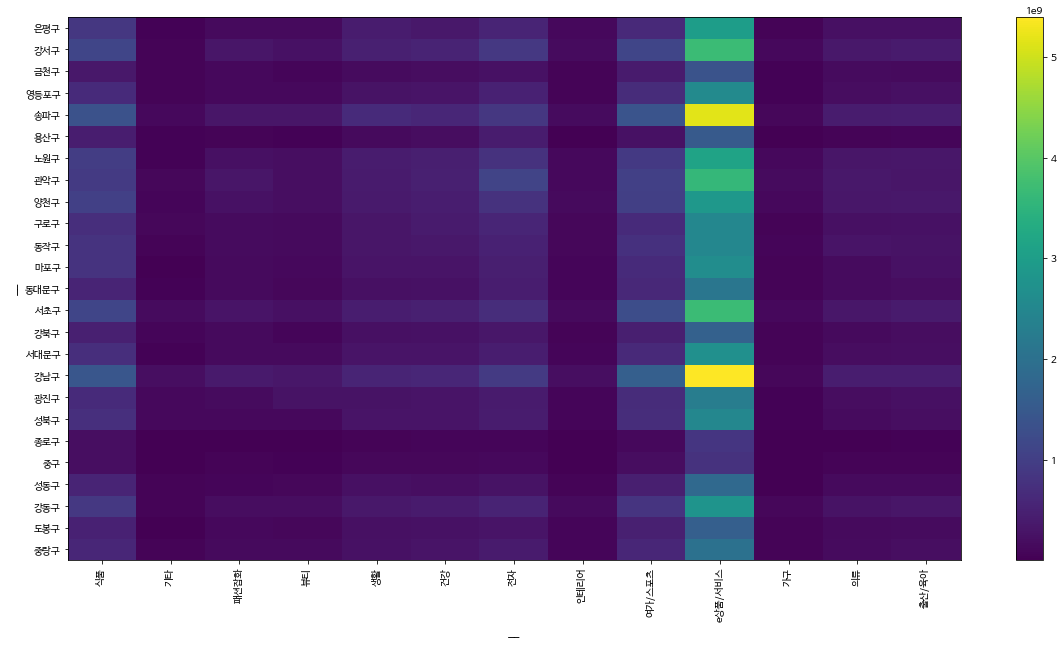

In [19]:
# 시군구 - 매출금액(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_2009[df_2009['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_money_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_money_large = sigoongu_money_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_money_large)
plt.xticks(np.arange(0.5, len(sigoongu_money_large.columns), 1), sigoongu_money_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_money_large.index), 1), sigoongu_money_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [20]:
# 시군구 - 매출금액(품목대분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_2009[df_2009['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending= False)

,식품,기타,패션잡화,뷰티,생활,건강,전자,인테리어,여가/스포츠,e상품/서비스,가구,의류,출산/육아
중랑구,17.0,12.0,15.0,14.0,17.0,15.0,18.0,12.0,18.0,18.0,14.0,17.0,16.0
도봉구,20.0,23.0,20.0,20.0,21.0,18.0,21.0,17.0,19.0,21.0,12.0,21.0,20.0
강동구,8.0,11.0,8.0,9.0,9.0,8.0,10.0,6.0,8.0,9.0,8.0,9.0,7.0
성동구,18.0,14.0,22.0,19.0,19.0,21.0,22.0,19.0,20.0,19.0,23.0,22.0,21.0
중구,25.0,25.0,24.0,23.0,24.0,24.0,24.0,24.0,24.0,25.0,22.0,23.0,24.0
종로구,24.0,24.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,24.0,25.0,25.0,25.0
성북구,12.0,3.0,19.0,17.0,12.0,17.0,17.0,16.0,10.0,14.0,21.0,19.0,15.0
광진구,16.0,5.0,11.0,3.0,15.0,12.0,19.0,15.0,11.0,16.0,19.0,12.0,13.0
강남구,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,6.0,1.0,2.0
서대문구,14.0,21.0,16.0,13.0,13.0,16.0,15.0,13.0,16.0,10.0,17.0,13.0,17.0


In [21]:
# 각 시군구 내에서 매출금액(품목대분류명) 기준 순위
pack = []
for gu in sigoongu:
    temp = df_2009[df_2009['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending= False, axis = 1)

,식품,기타,패션잡화,뷰티,생활,건강,전자,인테리어,여가/스포츠,e상품/서비스,가구,의류,출산/육아
중랑구,3.0,12.0,9.0,10.0,6.0,5.0,4.0,11.0,2.0,1.0,13.0,8.0,7.0
도봉구,2.0,13.0,9.0,10.0,6.0,5.0,4.0,11.0,3.0,1.0,12.0,8.0,7.0
강동구,2.0,13.0,10.0,9.0,6.0,5.0,4.0,11.0,3.0,1.0,12.0,8.0,7.0
성동구,2.0,12.0,10.0,9.0,5.0,6.0,4.0,11.0,3.0,1.0,13.0,8.0,7.0
중구,2.0,13.0,9.0,10.0,5.0,6.0,4.0,11.0,3.0,1.0,12.0,7.0,8.0
종로구,2.0,11.0,10.0,9.0,6.0,5.0,4.0,12.0,3.0,1.0,13.0,8.0,7.0
성북구,2.0,10.0,9.0,11.0,5.0,6.0,4.0,12.0,3.0,1.0,13.0,8.0,7.0
광진구,3.0,11.0,10.0,7.0,6.0,5.0,4.0,12.0,2.0,1.0,13.0,9.0,8.0
강남구,3.0,11.0,9.0,10.0,6.0,5.0,4.0,12.0,2.0,1.0,13.0,8.0,7.0
서대문구,2.0,13.0,9.0,10.0,5.0,6.0,4.0,11.0,3.0,1.0,12.0,8.0,7.0


In [22]:
# 클러스터링
# 시군구 - 매출금액(품목대분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_money_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_money_large['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_money_large[sigoongu_money_large['cluster_id'] == i]
    print(temp['cluster_id'])

중랑구     0
도봉구     0
성동구     0
강북구     0
동대문구    0
용산구     0
금천구     0
Name: cluster_id, dtype: int32
강동구     1
성북구     1
광진구     1
서대문구    1
마포구     1
동작구     1
구로구     1
양천구     1
영등포구    1
은평구     1
Name: cluster_id, dtype: int32
강남구    2
송파구    2
Name: cluster_id, dtype: int32
서초구    3
관악구    3
노원구    3
강서구    3
Name: cluster_id, dtype: int32
중구     4
종로구    4
Name: cluster_id, dtype: int32


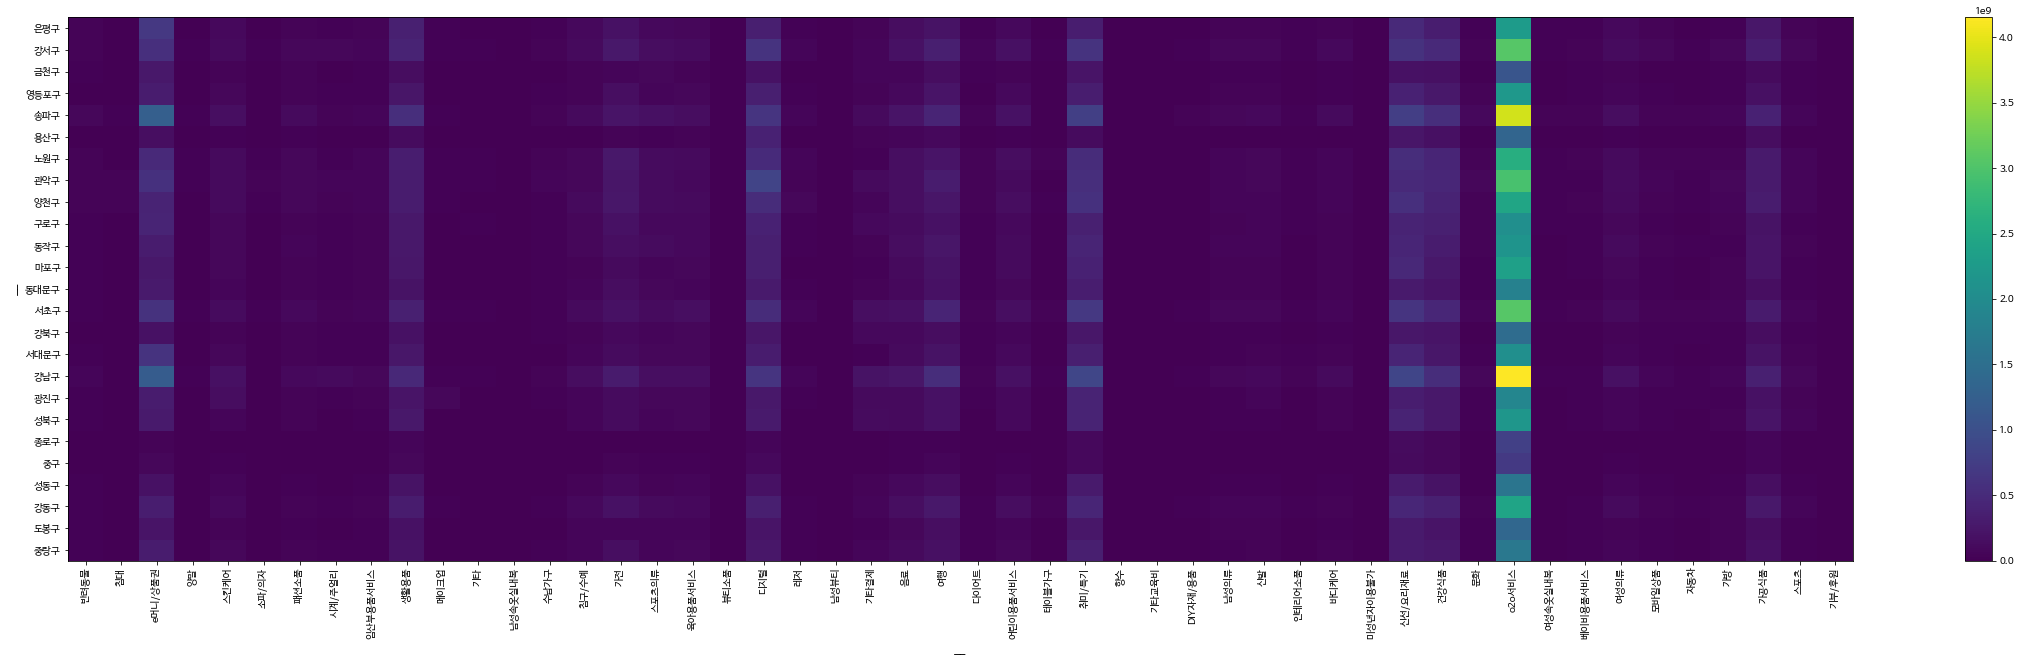

In [23]:
# 시군구 - 매출금액(품목중분류명)
pack = []
for gu in sigoongu:
    temp = df_2009[df_2009['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_money_middle = pd.DataFrame(pack, index=sigoongu)
sigoongu_money_middle = sigoongu_money_middle.fillna(0)
plt.figure(figsize=(40,10))
plt.pcolor(sigoongu_money_middle)
plt.xticks(np.arange(0.5, len(sigoongu_money_middle.columns), 1), sigoongu_money_middle, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_money_middle.index), 1), sigoongu_money_middle.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [24]:
#  시군구 - 매출금액(품목중분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_2009[df_2009['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False)

,반려동물,침대,e머니/상품권,양말,스킨케어,소파/의자,패션소품,시계/주얼리,임산부용품서비스,생활용품,...,o2o서비스,여성속옷실내복,베이비용품서비스,여성의류,모바일상품,자동차,가방,가공식품,스포츠,기부/후원
중랑구,8.0,11.0,14.0,13.0,16.0,14.0,18.0,13.0,15.0,19.0,...,18.0,14.0,12.0,13.0,18.0,21.0,11.0,17.0,17.0,4.0
도봉구,14.0,14.0,20.0,15.0,20.0,6.0,21.0,20.0,19.0,21.0,...,21.0,21.0,15.0,21.0,20.0,13.0,10.0,20.0,14.0,4.0
강동구,9.0,5.0,11.0,10.0,9.0,9.0,10.0,8.0,8.0,9.0,...,8.0,10.0,7.0,9.0,9.0,11.0,13.0,8.0,8.0,1.0
성동구,20.0,17.0,22.0,23.0,18.0,23.0,22.0,23.0,22.0,17.0,...,19.0,22.0,19.0,16.0,21.0,22.0,19.0,19.0,22.0,4.0
중구,24.0,18.0,24.0,25.0,24.0,20.0,24.0,22.0,24.0,24.0,...,25.0,24.0,23.0,23.0,24.0,23.0,23.0,24.0,23.0,4.0
종로구,25.0,18.0,25.0,24.0,25.0,24.0,25.0,25.0,25.0,25.0,...,24.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,4.0
성북구,19.0,18.0,17.0,18.0,17.0,22.0,20.0,21.0,18.0,11.0,...,12.0,20.0,16.0,17.0,15.0,20.0,8.0,12.0,9.0,4.0
광진구,13.0,18.0,12.0,9.0,3.0,17.0,15.0,17.0,12.0,16.0,...,16.0,11.0,11.0,19.0,11.0,10.0,17.0,15.0,10.0,4.0
강남구,2.0,9.0,2.0,2.0,1.0,15.0,3.0,1.0,1.0,2.0,...,1.0,3.0,9.0,1.0,3.0,8.0,3.0,2.0,1.0,2.0
서대문구,11.0,16.0,4.0,16.0,12.0,10.0,12.0,18.0,16.0,14.0,...,15.0,13.0,21.0,14.0,16.0,14.0,16.0,14.0,13.0,4.0


In [25]:
#  각 시군구 내에서 매출금액(품목중분류명) 기준 순위
pack = []
for gu in sigoongu:
    temp = df_2009[df_2009['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(method = 'min', ascending = False, axis = 1)

,반려동물,침대,e머니/상품권,양말,스킨케어,소파/의자,패션소품,시계/주얼리,임산부용품서비스,생활용품,...,o2o서비스,여성속옷실내복,베이비용품서비스,여성의류,모바일상품,자동차,가방,가공식품,스포츠,기부/후원
중랑구,24.0,44.0,3.0,42.0,14.0,39.0,21.0,31.0,23.0,7.0,...,1.0,36.0,26.0,15.0,28.0,41.0,22.0,9.0,25.0,50.0
도봉구,27.0,44.0,4.0,41.0,16.0,32.0,24.0,33.0,23.0,7.0,...,1.0,38.0,29.0,17.0,28.0,36.0,18.0,9.0,21.0,49.0
강동구,32.0,39.0,6.0,42.0,16.0,41.0,24.0,33.0,22.0,7.0,...,1.0,40.0,30.0,14.0,25.0,38.0,26.0,9.0,19.0,48.0
성동구,27.0,43.0,6.0,45.0,13.0,40.0,23.0,33.0,21.0,4.0,...,1.0,34.0,28.0,12.0,25.0,41.0,20.0,8.0,26.0,48.0
중구,24.0,45.0,7.0,45.0,14.0,32.0,17.0,23.0,27.0,6.0,...,1.0,35.0,31.0,11.0,34.0,41.0,19.0,8.0,22.0,45.0
종로구,31.0,36.0,8.0,35.0,13.0,36.0,20.0,36.0,25.0,6.0,...,1.0,27.0,29.0,18.0,22.0,36.0,32.0,7.0,28.0,36.0
성북구,27.0,47.0,4.0,40.0,16.0,41.0,22.0,32.0,24.0,6.0,...,1.0,35.0,28.0,18.0,26.0,37.0,20.0,8.0,19.0,47.0
광진구,29.0,47.0,4.0,38.0,10.0,39.0,23.0,35.0,24.0,7.0,...,1.0,36.0,27.0,20.0,26.0,34.0,28.0,8.0,21.0,47.0
강남구,30.0,44.0,2.0,38.0,14.0,43.0,21.0,19.0,24.0,8.0,...,1.0,35.0,34.0,15.0,29.0,41.0,27.0,9.0,23.0,48.0
서대문구,28.0,44.0,2.0,41.0,13.0,37.0,18.0,31.0,22.0,7.0,...,1.0,35.0,33.0,16.0,26.0,34.0,25.0,9.0,21.0,48.0


In [26]:
# 클러스터링
# 시군구 - 매출금액(품목중분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_money_middle.values
kmeans = KMeans(n_clusters=5).fit(datapoints)

sigoongu_money_middle['cluster_id'] = kmeans.labels_
for i in range(5):
    temp = sigoongu_money_middle[sigoongu_money_middle['cluster_id'] == i]
    print(temp['cluster_id'])

강동구     0
성북구     0
광진구     0
서대문구    0
마포구     0
동작구     0
구로구     0
양천구     0
영등포구    0
은평구     0
Name: cluster_id, dtype: int32
서초구    1
관악구    1
노원구    1
강서구    1
Name: cluster_id, dtype: int32
중구     2
종로구    2
금천구    2
Name: cluster_id, dtype: int32
강남구    3
송파구    3
Name: cluster_id, dtype: int32
중랑구     4
도봉구     4
성동구     4
강북구     4
동대문구    4
용산구     4
Name: cluster_id, dtype: int32
